In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
distances = [84, 150, 200, 250, 300, 348]
V = np.array([])
Vstd1 = np.array([])
Vstd10 = np.array([])

for i in range(6):
    df=pd.read_csv(str(distances[i])+'mm/anag2.csv', header=None, squeeze = True)
    V = np.append(V,np.mean(df[1:])*5/4095)
    
    V_1s=[np.mean(df[1:1000])]
    
    for j in range(299):
        V_1s.append(np.mean(df[1000*(j+1):1000*(j+2)]))
    
    Vstd1 = np.append(Vstd1,np.std(V_1s)*5/4095)
    
    V_10s=[np.mean(df[1:10000])]
    
    for j in range(29):
        V_10s.append(np.mean(df[10000*(j+1):10000*(j+2)]))
    
    Vstd10 = np.append(Vstd10,np.std(V_10s)*5/4095)

In [3]:
C = np.array([])
Cstd1 = np.array([])
Cstd10 = np.array([])

for i in range(6):

    df=pd.read_csv(str(distances[i])+'mm/anag1.csv', header=None, squeeze = True)

    Caux = [np.sum(df[1:1000])]

    for j in range(299):
        Caux.append(np.sum(df[1000*(j+1):1000*(j+2)]))

    C = np.append(C,np.mean(Caux))
    
    Cstd1 = np.append(Cstd1, np.std(Caux))
    
    Caux10 = []
    
    for j in range(30):
        Caux10.append(np.mean(Caux[10*j:10*(j+1)]))
        
    Cstd10 = np.append(Cstd10,np.std(Caux10))

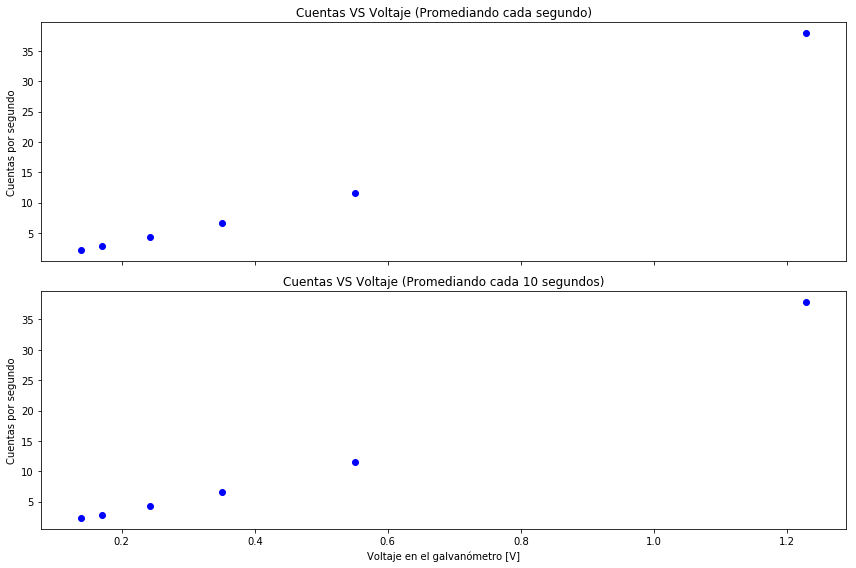

In [4]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(V,C, color='blue')
#ax[0].fill_between(V, C+Cstd1, C-Cstd1, facecolor='red', alpha=0.1)
#ax[0].fill_betweenx(C, V+Vstd1, V-Vstd1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Voltaje (Promediando cada segundo)')

ax[1].scatter(V,C, color='blue')
#ax[1].fill_between(V, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(C, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Voltaje en el galvanómetro [V]')
ax[1].set_ylabel('Cuentas por segundo')
ax[1].set_title('Cuentas VS Voltaje (Promediando cada 10 segundos)')

fig.tight_layout()

In [5]:
d = np.array(distances)

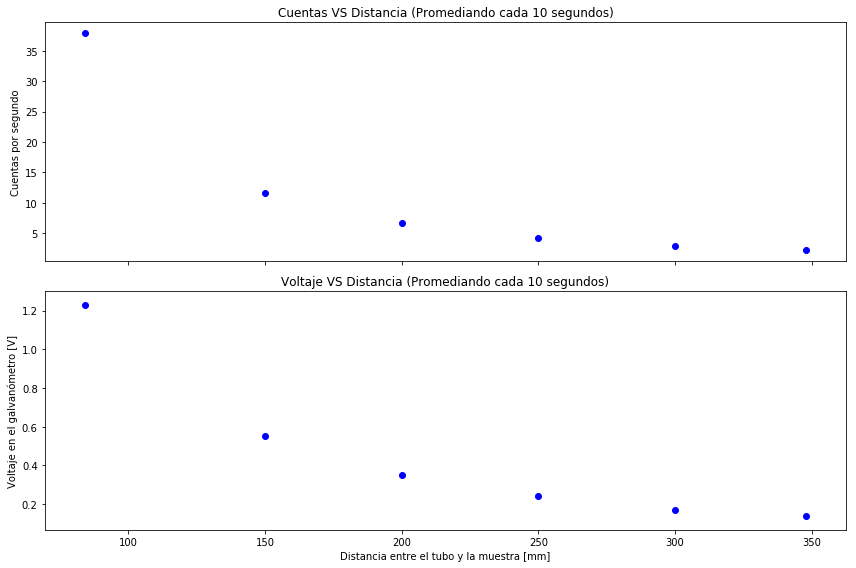

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(d,C, color='blue')
#ax[0].fill_between(d, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
#ax[0].fill_betweenx(C, d+1, d-1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia (Promediando cada 10 segundos)')

ax[1].scatter(d,V, color='blue')
#ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia (Promediando cada 10 segundos)')

fig.tight_layout()

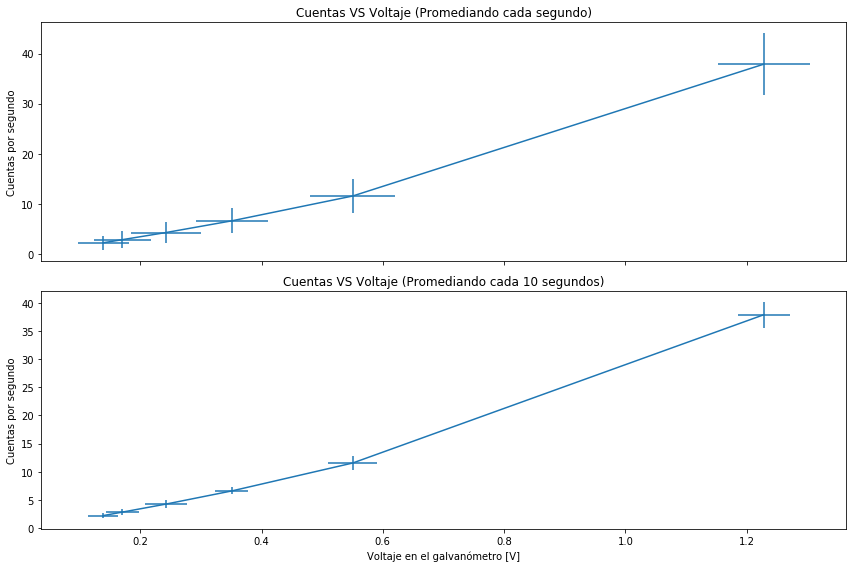

In [254]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(V,C, xerr=Vstd1, yerr=Cstd1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Voltaje (Promediando cada segundo)')

ax[1].errorbar(V,C, xerr=Vstd10, yerr=Cstd10)
ax[1].set_xlabel('Voltaje en el galvanómetro [V]')
ax[1].set_ylabel('Cuentas por segundo')
ax[1].set_title('Cuentas VS Voltaje (Promediando cada 10 segundos)')

fig.tight_layout()

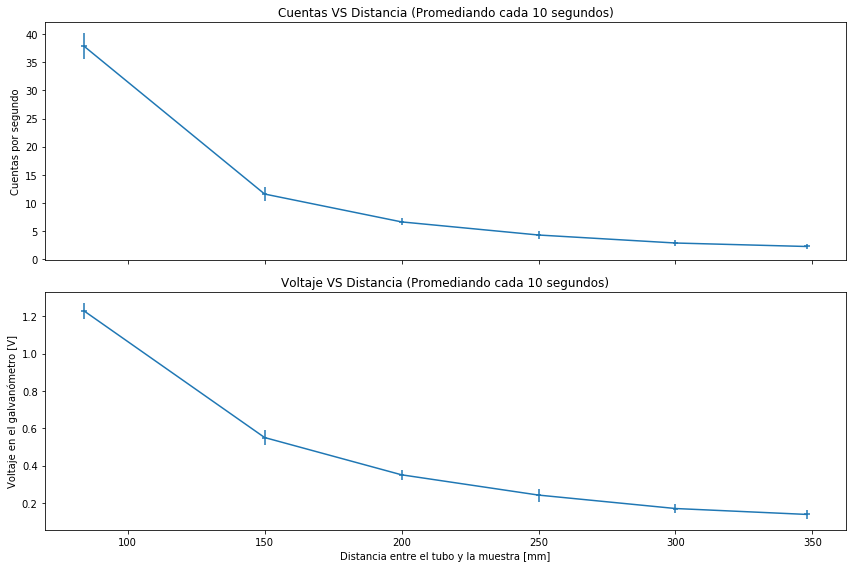

In [257]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(d,C, xerr=1, yerr=Cstd10)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia (Promediando cada 10 segundos)')

ax[1].errorbar(d,V, xerr=1, yerr=Vstd10)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia (Promediando cada 10 segundos)')

fig.tight_layout()

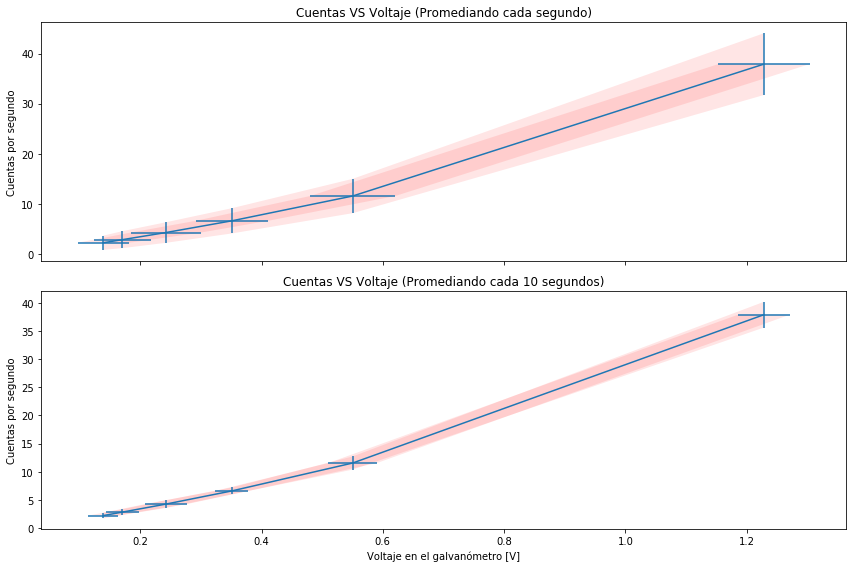

In [259]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(V,C, xerr=Vstd1, yerr=Cstd1)
ax[0].fill_between(V, C+Cstd1, C-Cstd1, facecolor='red', alpha=0.1)
ax[0].fill_betweenx(C, V+Vstd1, V-Vstd1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Voltaje (Promediando cada segundo)')

ax[1].errorbar(V,C, xerr=Vstd10, yerr=Cstd10)
ax[1].fill_between(V, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
ax[1].fill_betweenx(C, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Voltaje en el galvanómetro [V]')
ax[1].set_ylabel('Cuentas por segundo')
ax[1].set_title('Cuentas VS Voltaje (Promediando cada 10 segundos)')

fig.tight_layout()

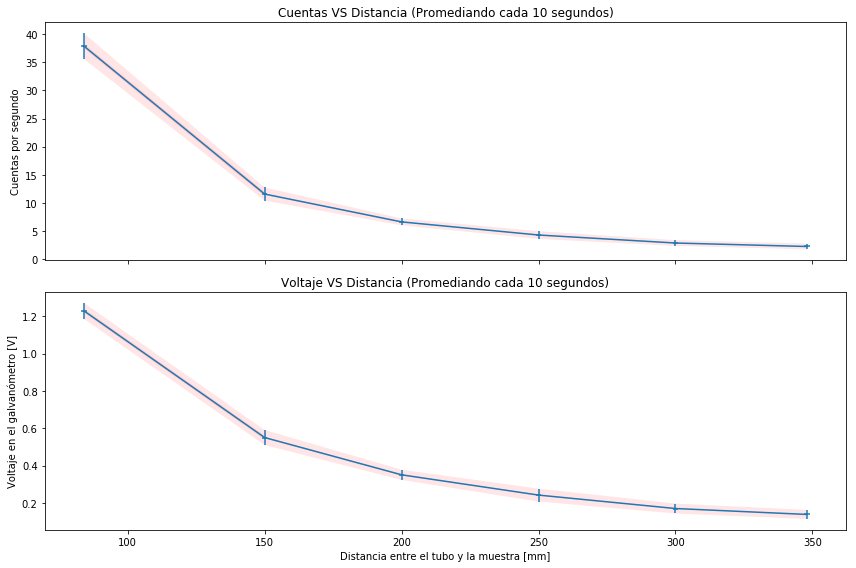

In [262]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].errorbar(d,C, xerr=1, yerr=Cstd10)
ax[0].fill_between(d, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
ax[0].fill_betweenx(C, d+1, d-1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Distancia (Promediando cada 10 segundos)')

ax[1].errorbar(d,V, xerr=1, yerr=Vstd10)
ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Distancia (Promediando cada 10 segundos)')

fig.tight_layout()